#Etapa 1 do projeto de PLN

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
resenha = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Di2Win/Alura_3/imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, 
                                                              resenha.sentiment,
                                                              random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
regressao_log = LogisticRegression()

In [8]:
classificacao = resenha.sentiment.replace(['neg', 'pos'], [0,1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [9]:
resenha['classificacao'] = classificacao
resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [12]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [13]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [14]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [15]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                                texto[coluna_classificacao],
                                                                random_state=42)

  regressao_log = LogisticRegression()
  regressao_log.fit(treino, classe_treino)
  acuracia = regressao_log.score(teste, classe_teste) * 100
  print("Acuracia: %.2f" %acuracia)

In [16]:
classificar_texto(resenha,"text_pt", "classificacao")

Acuracia: 65.83


In [17]:
%matplotlib inline
from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])


In [18]:
nuvem_palavras = WordCloud(width=800, height=500, 
                           max_font_size=110, 
                           collocations=False).generate(todas_palavras)

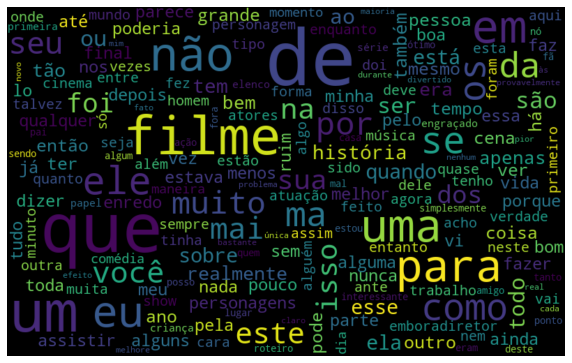

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
def nuvem_palavras(texto, coluna_texto, sentimento):
  if sentimento == 'neg':
    new_texto = texto.query("sentiment == 'neg'")
  else:
    new_texto = texto.query("sentiment == 'pos'")

  todas_palavras = ' '.join([texto for texto in new_texto[coluna_texto]])
  nuvem_palavras = WordCloud(width=800, height=500, 
                            max_font_size=110, 
                            collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

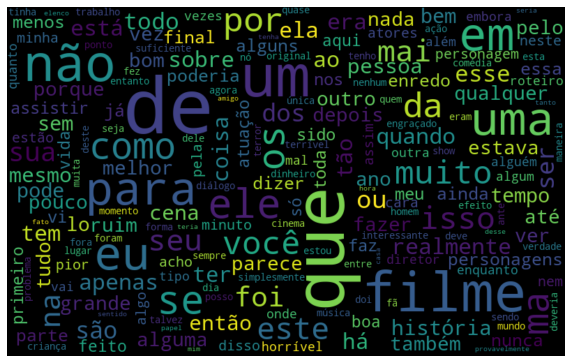

In [21]:
nuvem_palavras(resenha, "text_pt", 'neg')

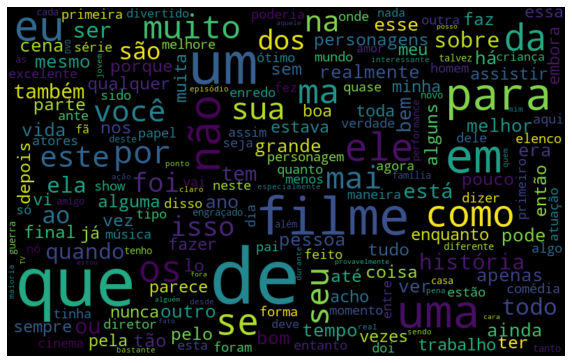

In [22]:
nuvem_palavras(resenha, "text_pt", 'pos')

In [23]:
import nltk
frase = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [24]:
from nltk import tokenize
frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

In [25]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame(({"Palavra": list(frequencia.keys()), "Frequencia": list(frequencia.values())}))

In [26]:
df_frequencia.nlargest(columns="Frequencia", n=10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [27]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


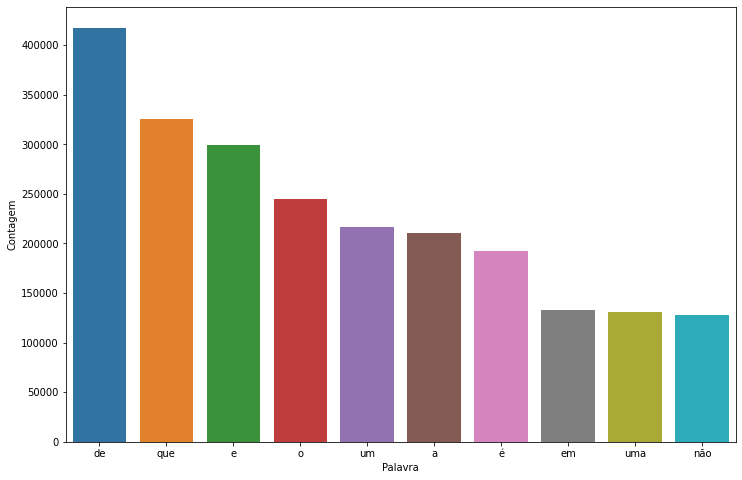

In [28]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_frequencia.nlargest(columns="Frequencia", n=10), x="Palavra", y="Frequencia")
ax.set(ylabel="Contagem")
plt.show()

In [29]:
def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_espaco = tokenize.WhitespaceTokenizer()
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame(({"Palavra": list(frequencia.keys()), "Frequencia": list(frequencia.values())}))
  df_frequencia = df_frequencia.nlargest(columns="Frequencia", n=quantidade)
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequencia")
  ax.set(ylabel="Contagem")
  plt.show()

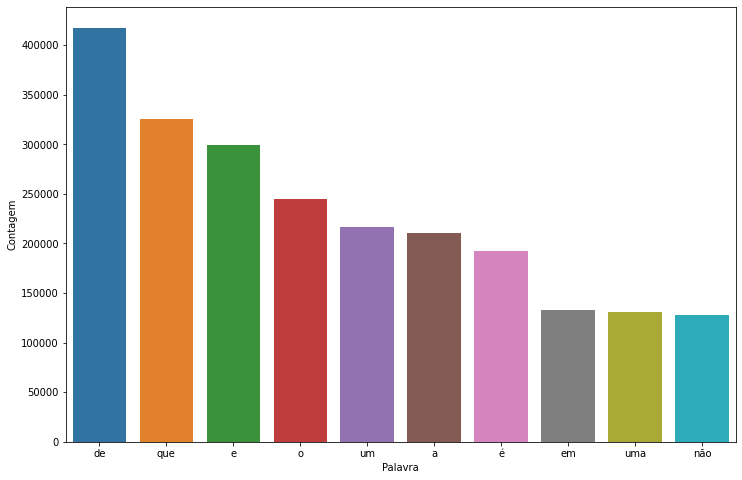

In [30]:
pareto(resenha, "text_pt", 10)

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
frase_processada = list()
for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))
  
resenha["tratamento_1"] = frase_processada

In [33]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [34]:
classificar_texto(resenha, "tratamento_1", "classificacao")

Acuracia: 66.07


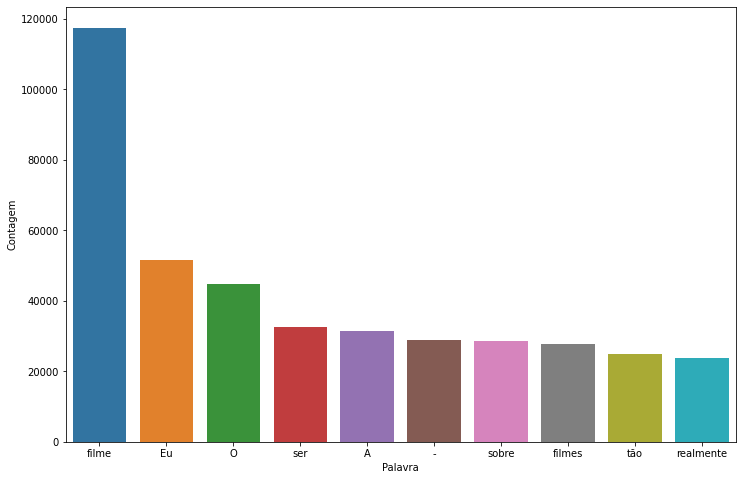

In [35]:
pareto(resenha, "tratamento_1", 10)

#Etapa 2 do projeto de PLN

In [40]:
from string import punctuation
from nltk import tokenize
token_pontuacao = tokenize.WordPunctTokenizer()

In [41]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha['tratamento_1']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_2'] = frase_processada

In [42]:
resenha['tratamento_1'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [43]:
resenha['tratamento_2'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

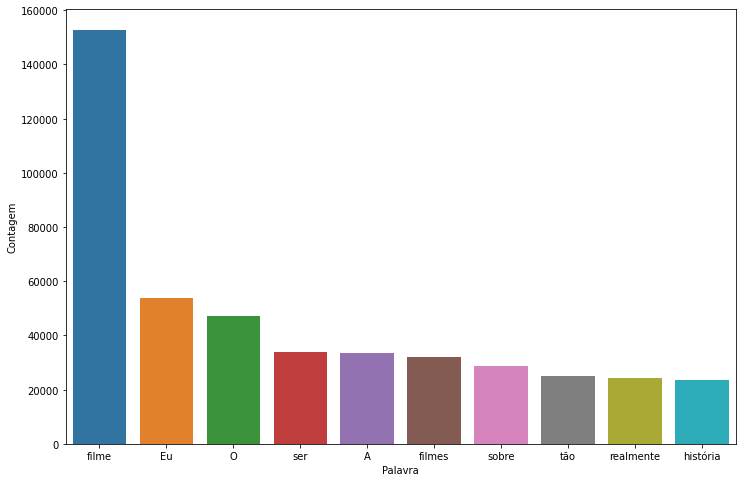

In [44]:
pareto(resenha, 'tratamento_2', 10)

In [49]:
!pip install Unidecode

     |████████████████████████████████| 245kB 2.8MB/s 


In [50]:
import unidecode

In [52]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [53]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [54]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [55]:
resenha['tratamento_3'] = sem_acentos

frase_processada = list()
for opiniao in resenha['tratamento_3']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_3'] = frase_processada

In [56]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [57]:
classificar_texto(resenha, 'tratamento_3', 'classificacao')

Acuracia: 68.10


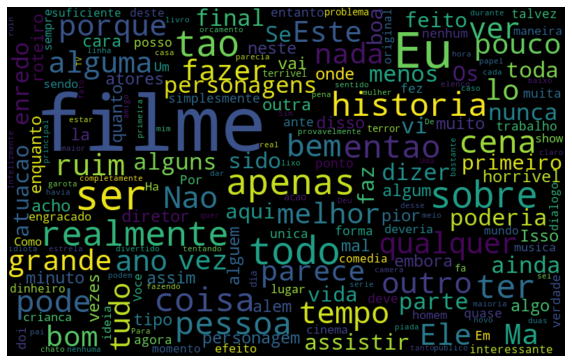

In [58]:
nuvem_palavras(resenha, 'tratamento_3', 'neg')

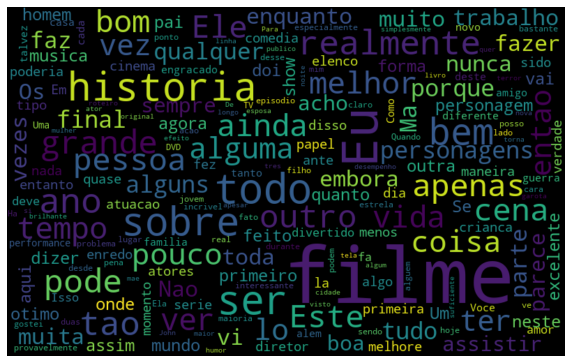

In [59]:
nuvem_palavras(resenha, 'tratamento_3', 'pos')

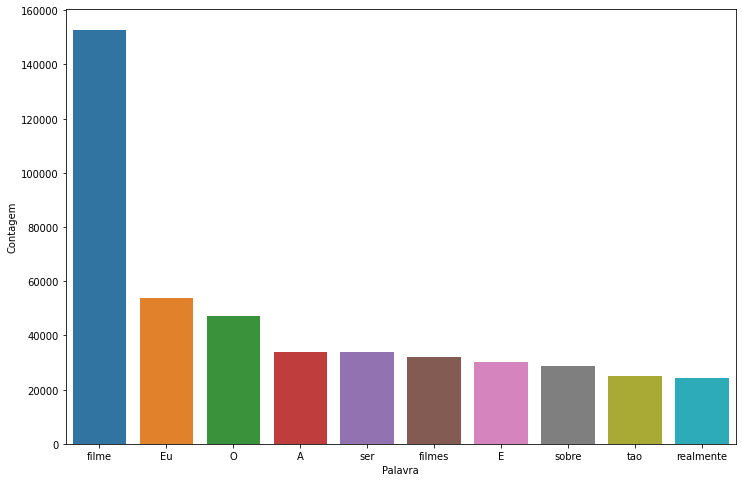

In [60]:
pareto(resenha, 'tratamento_3', 10)

In [61]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
  nova_frase = list()
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_4'] = frase_processada

In [62]:
classificar_texto(resenha, 'tratamento_4', 'classificacao')

Acuracia: 68.79


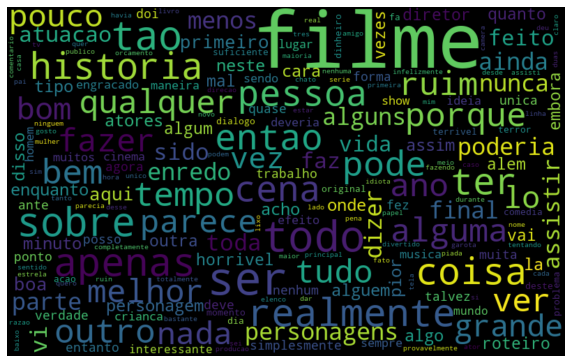

In [63]:
nuvem_palavras(resenha, 'tratamento_4', 'neg')

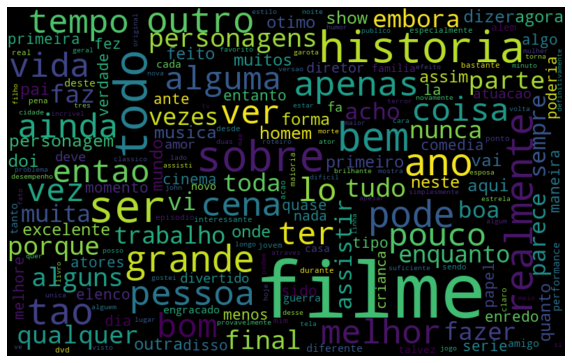

In [64]:
nuvem_palavras(resenha, 'tratamento_4', 'pos')

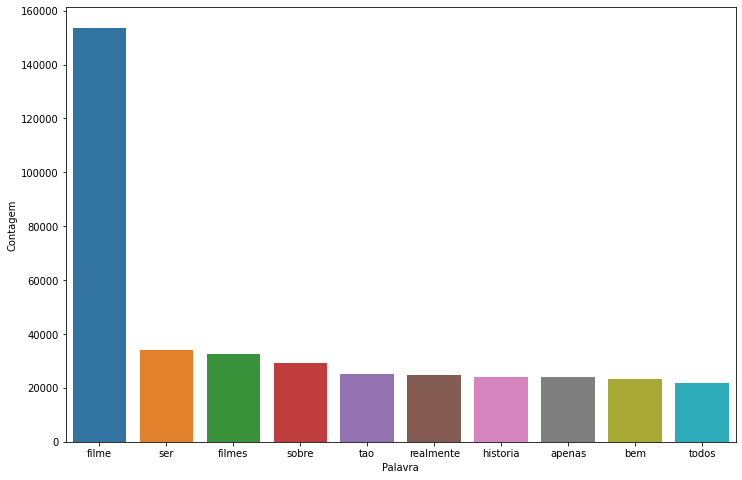

In [65]:
pareto(resenha, 'tratamento_4', 10)

In [68]:
import nltk
nltk.download('rslp')
stemmer = nltk.RSLPStemmer()

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [69]:
frase_processada = list()
for opiniao in resenha['tratamento_4']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_5'] = frase_processada

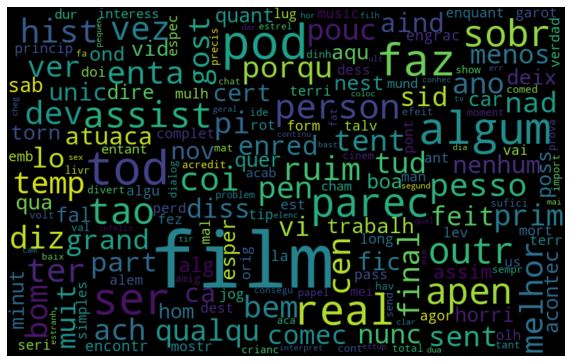

In [70]:
nuvem_palavras(resenha, 'tratamento_5', 'neg')

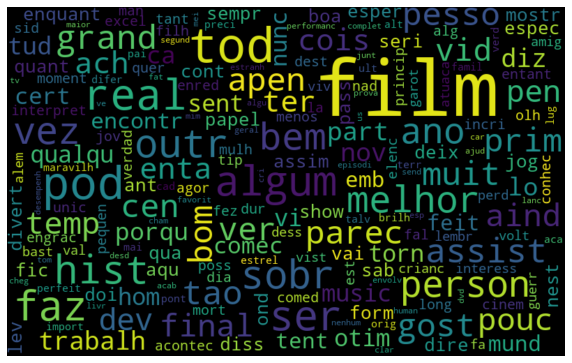

In [71]:
nuvem_palavras(resenha, 'tratamento_5', 'pos')

In [72]:
classificar_texto(resenha, 'tratamento_5', 'classificacao')

Acuracia: 69.44


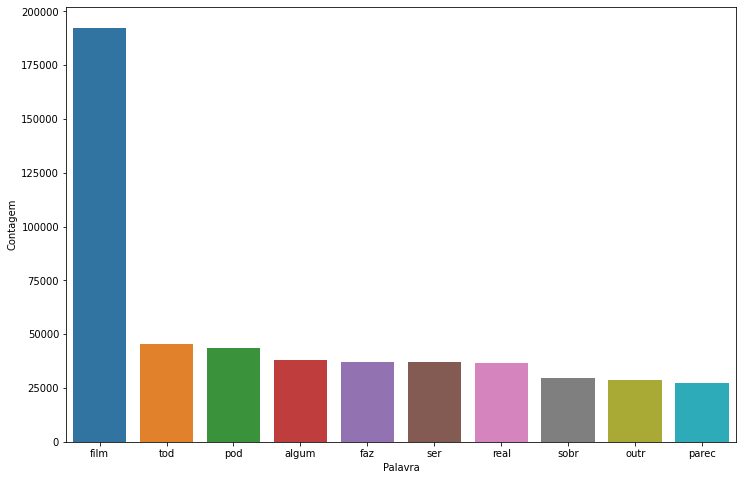

In [73]:
pareto(resenha, 'tratamento_5', 10)

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

In [77]:
frases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']
caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names())

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [79]:
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, 
                                                              resenha['classificacao'],
                                                              random_state=42)

regressao_log.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_log.score(teste, classe_teste) * 100
acuracia_tfidf_bruto

66.0088960776385

In [81]:
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, 
                                                              resenha['classificacao'],
                                                              random_state=42)

regressao_log.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_log.score(teste, classe_teste) * 100
acuracia_tfidf_tratados

69.88273352203801

In [82]:
from nltk import ngrams

In [83]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha['classificacao'],
                                                              random_state=42)

In [85]:
regressao_log.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_log.score(teste, classe_teste) * 100
acuracia_tfidf_ngrams

88.58875859280226

In [86]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha['classificacao'],
                                                              random_state=42)

regressao_log.fit(treino, classe_treino)
acuracia_tfidf = regressao_log.score(teste, classe_teste) * 100
acuracia_tfidf

88.41892438334007

In [87]:
pesos = pd.DataFrame(regressao_log.coef_[0].T,
                     index=tfidf.get_feature_names())

pesos.nlargest(10,0)

,0
otim,8.290477
excel,7.978023
perfeit,6.578863
favorit,5.778018
maravilh,5.286500
incri,5.049495
hilari,4.653807
divert,4.579574
ador,4.422221
brilh,4.268573


In [88]:
pesos.nsmallest(10,0)

,0
pi,-9.175704
ruim,-9.169727
horri,-8.751674
terri,-7.186909
chat,-6.919291
nad,-6.029855
infeliz,-5.310519
decepca,-4.995830
ridicul,-4.950824
nenhum,-4.918832
